Group Members

*   Jerry Dong
*   Anish Gamadia
*   Wanjiru Randolph
*   Catarina Vuzi
*   Haridev Desai






In [ ]:
!ls

sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#**Part 1: Data Understanding**

##**Exploratory Data Analysis**

In [ ]:
df = pd.read_csv('house_price (1).csv')
df.head()

,beds,baths,size,lot_size,price
0,3,2.5,2590,6000.00,795000
1,4,2.0,2240,0.31,915000
2,4,3.0,2040,3783.00,950000
3,4,3.0,3800,5175.00,1950000
4,2,2.0,1042,NaN,950000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   int64  
 3   lot_size  1669 non-null   float64
 4   price     2016 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 78.9 KB


In [ ]:
df.describe()

,beds,baths,size,lot_size,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,2.500000e+07


In [ ]:
#Checking for any entry errors, duplicates, and negative values
invalid_entries = df[df.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:  \n", invalid_entries)

duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicates)

Missing_Values = pd.DataFrame.isnull(df)
print('\nMissing values in our dataset:\n', pd.DataFrame.sum(Missing_Values))

Invalid Entries:  
 beds        0
baths       0
size        0
lot_size    0
price       0
dtype: int64

Number of Duplicate Records: 9

Missing values in our dataset:
 beds          0
baths         0
size          0
lot_size    347
price         0
dtype: int64


#**Visualization**

In [ ]:
#Visualize the columns without data pre-processing
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bar graph for {column}')
    plt.show()

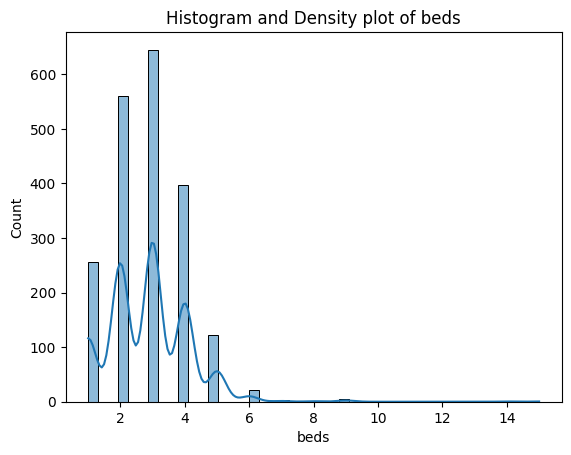

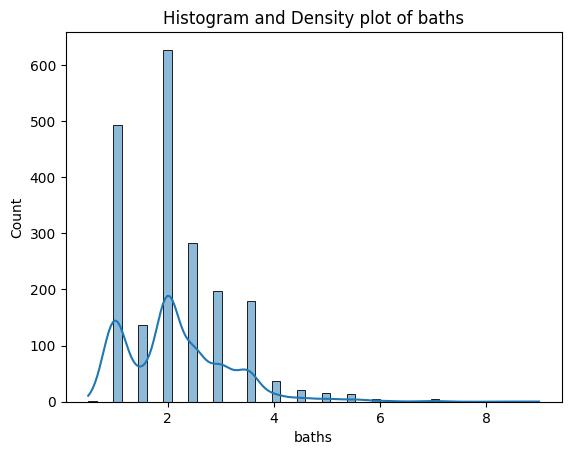

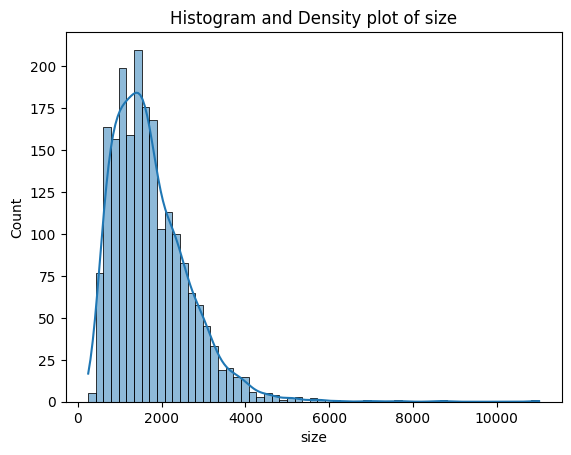

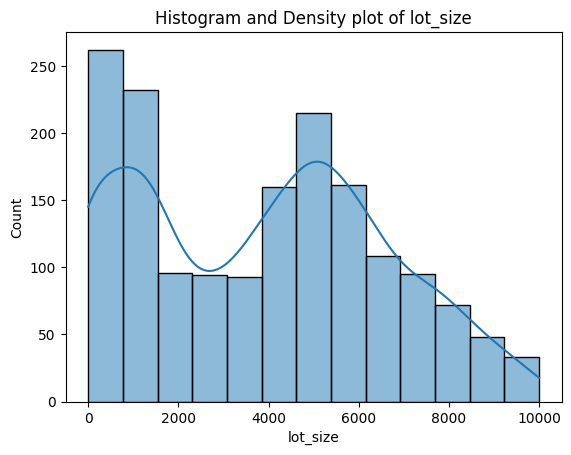

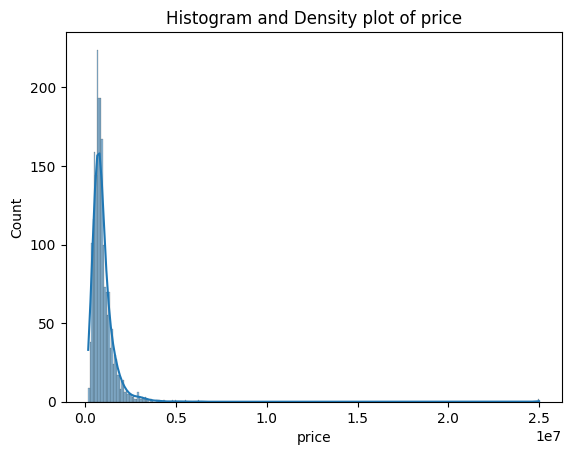

In [ ]:
##Dataset distribution
for col in df. select_dtypes(include=['number']).columns:
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram and Density plot of {col}")
  plt.show()

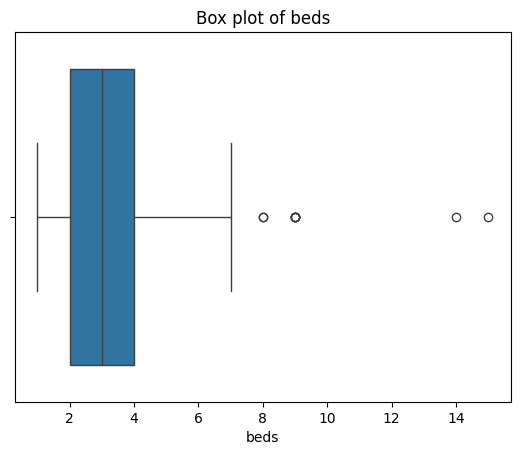

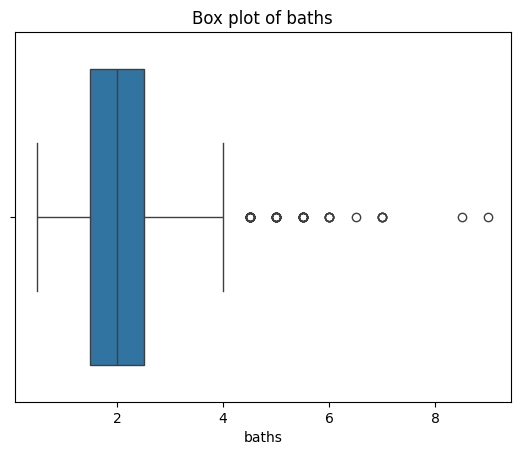

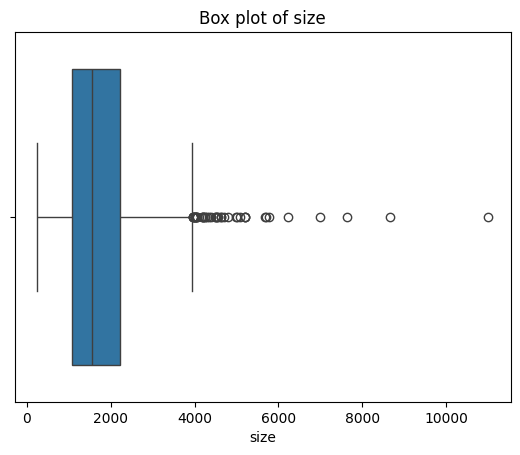

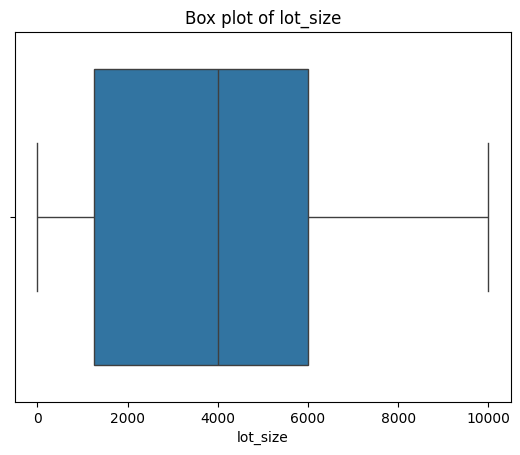

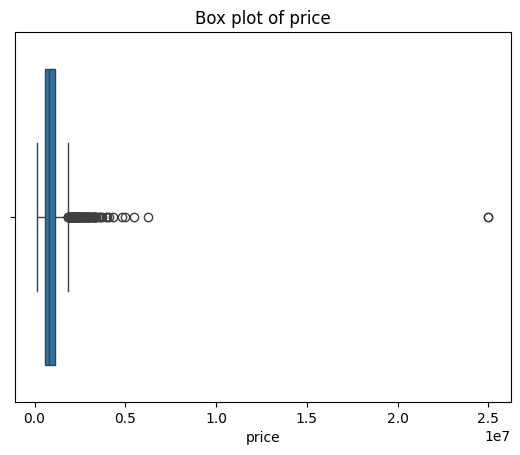

In [ ]:
for col in df. select_dtypes(include=['number']).columns:
  sns.boxplot(x=df[col])
  plt.title(f"Box plot of {col}")
  plt.show()

#**Part 2: Data Preprocessing**

##**Cleaning**

Identifying potential outliers/duplicates and dropping them as there are a lot of irregular values that do not align with the norm. This should help our distribution of the processed dataset and also help our models perform better.

In [ ]:
Q1 = df['beds'].quantile(0.25)
Q3 = df['beds'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound (IQR Method):", lower_bound)
print("Upper Bound (IQR Method):", upper_bound)

outliers = df[(df['beds'] < lower_bound) | (df['beds'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Total number of potential outliers for 'beds':",num_outliers)

#Detecting outliers for 'bath'
Q1 = df['baths'].quantile(0.25)
Q3 = df['baths'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound (IQR Method):", lower_bound)
print("Upper Bound (IQR Method):", upper_bound)

outliers = df[(df['baths'] < lower_bound) | (df['baths'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Total number of potential outliers for 'bath':",num_outliers)

#Detecting outliers for size
Q1 = df['size'].quantile(0.25)
Q3 = df['size'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound (IQR Method):", lower_bound)
print("Upper Bound (IQR Method):", upper_bound)

outliers = df[(df['size'] < lower_bound) | (df['size'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Total number of potential outliers for 'size':",num_outliers)

#Detecting outliers for 'lot_size'
Q1 = df['lot_size'].quantile(0.25)
Q3 = df['lot_size'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound (IQR Method):", lower_bound)
print("Upper Bound (IQR Method):", upper_bound)

outliers = df[(df['lot_size'] < lower_bound) | (df['lot_size'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Total number of potential outliers for 'lot_size':",num_outliers)

#Detecting outliers for 'prices'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound (IQR Method):", lower_bound)
print("Upper Bound (IQR Method):", upper_bound)

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Total number of potential outliers for 'price':",num_outliers)


Lower Bound (IQR Method): -1.0
Upper Bound (IQR Method): 7.0
Total number of potential outliers for 'beds': 9

Lower Bound (IQR Method): 0.0
Upper Bound (IQR Method): 4.0
Total number of potential outliers for 'bath': 62

Lower Bound (IQR Method): -661.875
Upper Bound (IQR Method): 3953.125
Total number of potential outliers for 'size': 44

Lower Bound (IQR Method): -5870.0
Upper Bound (IQR Method): 13122.0
Total number of potential outliers for 'lot_size': 0

Lower Bound (IQR Method): -153500.0
Upper Bound (IQR Method): 1860500.0
Total number of potential outliers for 'price': 119


In [ ]:
df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

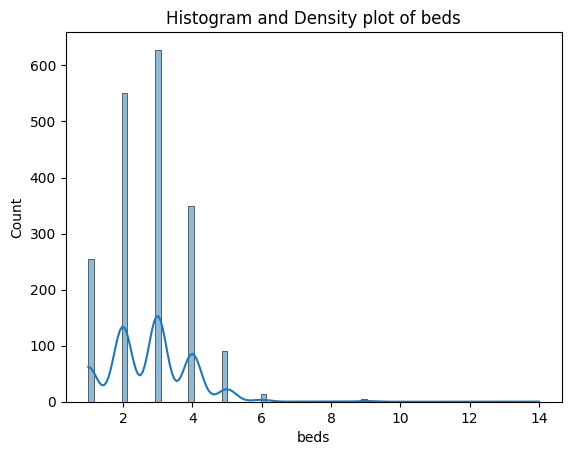

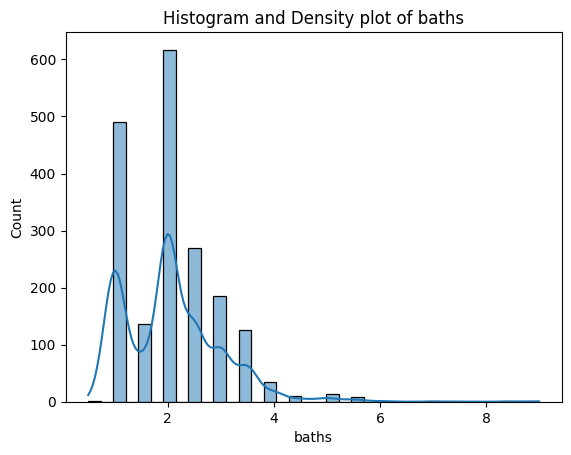

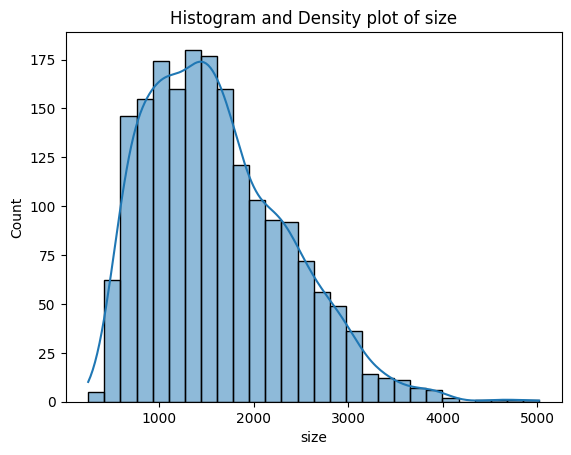

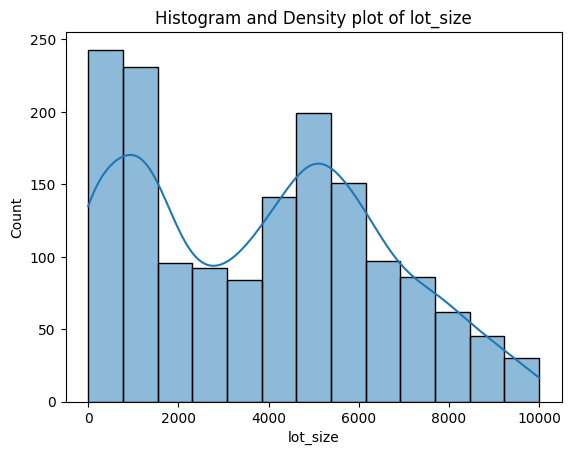

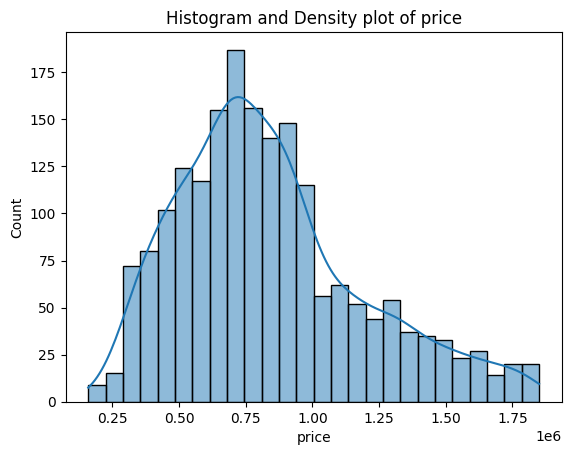

In [ ]:
for col in df. select_dtypes(include=['number']).columns:
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram and Density plot of {col}")
  plt.show()

In [ ]:
#Dropping duplicates in the dataset
duplicates_before = df.duplicated().sum()
print("Number of Duplicate Records (Before):", duplicates_before)

df_dropped = df.drop_duplicates()

duplicates_after = df_dropped.duplicated().sum()
print("\nNumber of Duplicate Records (After):", duplicates_after)

Number of Duplicate Records (Before): 9

Number of Duplicate Records (After): 0


In [ ]:
df.describe()

,beds,baths,size,lot_size,price
count,1897.000000,1897.000000,1897.000000,1557.000000,1.897000e+03
mean,2.772799,2.071692,1617.085398,3810.912691,8.381622e+05
std,1.188703,0.923284,739.538762,2712.524839,3.500931e+05
min,1.000000,0.500000,250.000000,0.230000,1.590000e+05
25%,2.000000,1.000000,1040.000000,1247.000000,5.900000e+05
50%,3.000000,2.000000,1512.000000,4000.000000,7.780000e+05
75%,3.000000,2.500000,2100.000000,5996.000000,1.005000e+06
max,14.000000,9.000000,5020.000000,9998.000000,1.850000e+06


##**Transformation**

Using median imputation helps with invalid entries, 'NaN'. helps fill in the invalid entries without losing data that could be viable for our model. Mean imputation also works, but when running it, it resulted in the same distribution and analysis results.

Our median we are using for imputation of 'lot_size': 4526.5


Text(0.5, 1.0, '\nHistogram of Lot Size')

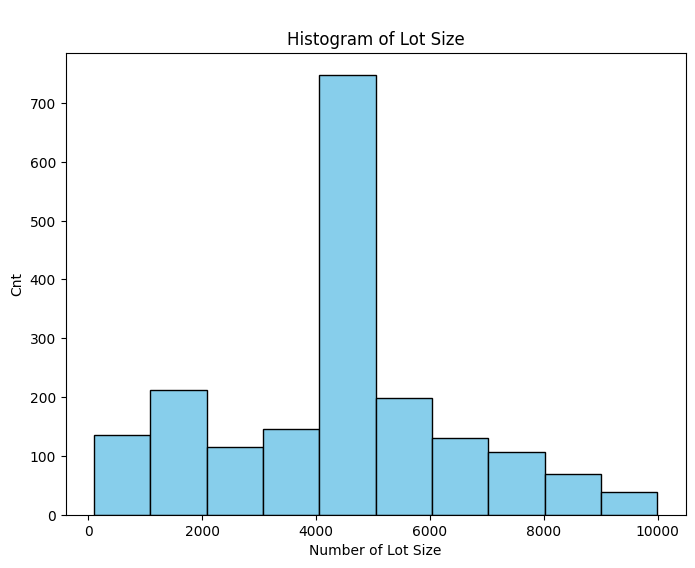

In [ ]:
median_lot_size = df.loc[df['lot_size'] >= 10, 'lot_size'].median()
print("Our median we are using for imputation of 'lot_size':", median_lot_size)


df['lot_size'] = df['lot_size'].fillna(median_lot_size)
df.loc[df['lot_size'] < 10, 'lot_size'] = median_lot_size


#Visualization
plt.figure(figsize=(8, 6))
plt.hist(df['lot_size'], bins=10, color='skyblue', edgecolor='black')


plt.xlabel('Number of Lot Size')
plt.ylabel('Cnt')
plt.title('\nHistogram of Lot Size')

In [ ]:
df.describe()

,beds,baths,size,lot_size,price
count,1897.000000,1897.000000,1897.000000,1897.000000,1.897000e+03
mean,2.772799,2.071692,1617.085398,4413.896943,8.381622e+05
std,1.188703,0.923284,739.538762,2072.845738,3.500931e+05
min,1.000000,0.500000,250.000000,100.000000,1.590000e+05
25%,2.000000,1.000000,1040.000000,3200.000000,5.900000e+05
50%,3.000000,2.000000,1512.000000,4526.500000,7.780000e+05
75%,3.000000,2.500000,2100.000000,5350.000000,1.005000e+06
max,14.000000,9.000000,5020.000000,9998.000000,1.850000e+06


##**Feature Engireering**

Implementing feature engineering helps the models increase predicitve power and interpretability of the data for the model to be more accurate when predicting.

When trying to identify potential features, in our case using variables with 0.6 > correlation compared to using 0.5> or 0.7>, improves our model more as it provides enough valuable information without over complicating the model or not providing enough.

              beds     baths      size  lot_size     price
beds      1.000000  0.628532  0.772843  0.164282  0.547789
baths     0.628532  1.000000  0.621689 -0.106665  0.547236
size      0.772843  0.621689  1.000000  0.214690  0.723357
lot_size  0.164282 -0.106665  0.214690  1.000000  0.050433
price     0.547789  0.547236  0.723357  0.050433  1.000000


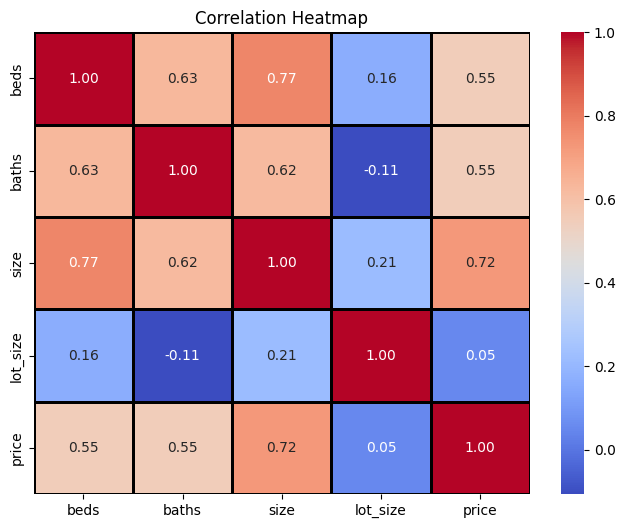

In [ ]:
#Corrrelation heatmap to help us determine which features are suitable
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')

plt.title('Correlation Heatmap')

plt.show()

In [ ]:
corr_matrix = df.corr()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [(col1, col2) for col1, col2 in upper_triangle.stack().index if abs(upper_triangle.loc[col1, col2]) > 0.60]

# Create new combined features for the pairs above 0.60> correlation
for col1, col2 in high_corr_pairs:
    new_feature_name = f"{col1}_{col2}_combined"
    df[new_feature_name] = df[col1] * df[col2]

original_columns = ['beds', 'baths', 'size', 'lot_size', 'price']
df = df[original_columns + [col for col in df.columns if 'combined' in col]]

print(df)

      beds  baths  size  lot_size    price  beds_baths_combined  \
0        3    2.5  2590    6000.0   795000                  7.5   
1        4    2.0  2240    4526.5   915000                  8.0   
2        4    3.0  2040    3783.0   950000                 12.0   
4        2    2.0  1042    4526.5   950000                  4.0   
5        2    2.0  1190    4526.5   740000                  4.0   
...    ...    ...   ...       ...      ...                  ...   
2011     3    2.0  1370    4526.5   910000                  6.0   
2012     1    1.0   889    4526.5   550000                  1.0   
2013     4    2.0  2140    6250.0  1150000                  8.0   
2014     2    2.0   795    4526.5   590000                  4.0   
2015     3    2.0  1710    4267.0   659000                  6.0   

      beds_size_combined  baths_size_combined  size_price_combined  
0                   7770               6475.0           2059050000  
1                   8960               4480.0           2

#**Part 3: Model Development and Evaluation**

##**Model Selection**

In [ ]:
#Random Forest Model

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Train RMSE: 14547.819942146341
Test RMSE: 35983.20956126292
Train R^2 Score: 0.9982578428547999
Test R^2 Score: 0.9897693727156018


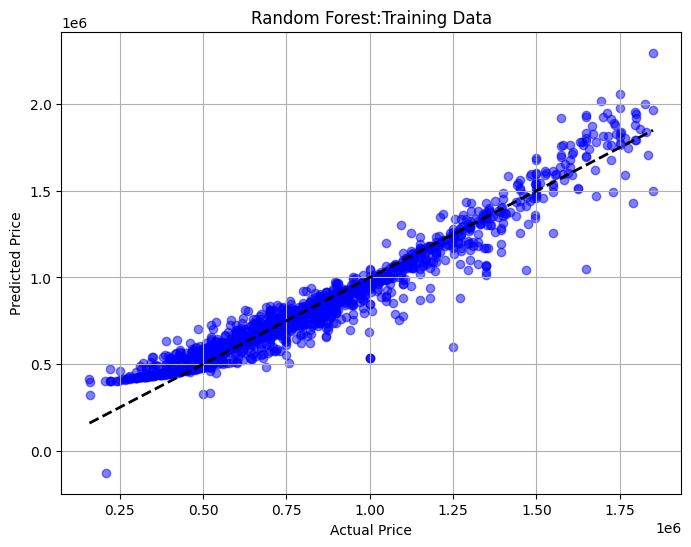

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, train_preds, color='b', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest:Training Data")
plt.grid(True)
plt.show()

From our Random Forest Model, we get:

*   Test R^2: 0.989
*   Test RMSE 35983.20

R^2, coefficient of determination, tells us how much of the variance in the target variable is explained by the independent variables. In this case how 'price' is explained by the other variables.

R^2, ranges from 0-1, where 1 indicates that the model perfectly fits the data, explaining all variances.
As out R^2 = 0.989, this suggests our model very strongly explains how much the variance is explained by the indepdent variable.

In addition, RMSE, Root Mean Square Error, measure of the average deviation of predicated values to actual values. As lower RMSE in respect to the data/scale is the goal, our test RMSE, is respectable. In that on average we are about $35,000 from the actual value, the 'price' of the home.

The random forest model seems to be a very strong predictor in modeling our house price dataset.




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Linear Regression Model
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Train RMSE: 92446.31341155765
Test RMSE: 96588.9064512058
Train R^2 Score: 0.9296489334213328
Test R^2 Score: 0.9262848140985882


From our Linear Regression Model, we get:

*   Test R^2: 0.926
*   Test RMSE 96588.90

R^2, coefficient of determination, tells us how much of the variance in the target variable is explained by the independent variables. In this case how 'price' is explained by the other variables.

R^2, ranges from 0-1, where 1 indicates that the model perfectly fits the data, explaining all variances.
As out R^2 = 0.926, this suggests our model very strongly explains how much the variance is explained by the indepdent variable.

In addition, RMSE, Root Mean Square Error, measure of the average deviation of predicated values to actual values. As lower RMSE in respect to the data/scale is the goal, our test RMSE, is respectable. In that on average we are about $97,000 from the actual value, the 'price' of the home.

The linear regression model seems to be a very strong predictor in modeling our house price dataset. However, it is not the best model compared to our Random Forest Model which scored higher in R^2 and lower in RMSE.

In [ ]:
from sklearn.metrics import r2_score

# The adjusted R-squared for training data
n_train = len(y_train)
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - train_r2) * (n_train - 1) / (n_train - p_train - 1))
print("Adjusted R^2 for Training Data:", adjusted_r2_train)

Adjusted R^2 for Training Data: 0.9292757182140189


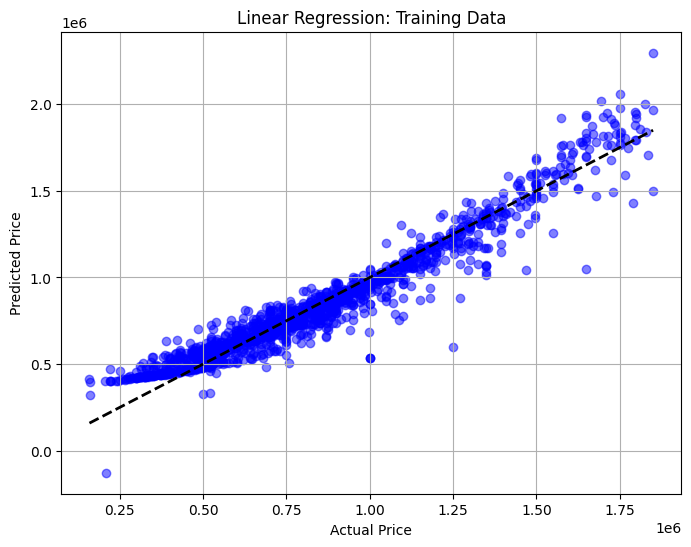

In [ ]:
##Visualizing our training results. scatter plot of actual vs. predicted values for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, train_preds, color='b', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Training Data")
plt.grid(True)
plt.show()

#####The points should lie close to the diagonal line (k–), indicating a strong correlation between actual and predicted prices.